In [1]:
# # Import module yang disediakan google colab untuk kebutuhan upload file
# from google.colab import files
# files.upload()
!rm -rf source source-new dataset

In [2]:
!mkdir -p dataset/train/cat dataset/train/dog dataset/validation/cat dataset/validation/dog
!unzip -q source-new.zip
!mv source-new source

In [3]:
import os
import shutil
import random

# Path ke folder source-new dan target dataset
source_dir = 'source/'
train_dir = 'dataset/train/'
val_dir = 'dataset/validation/'

# Buat struktur folder untuk dataset
os.makedirs(train_dir + 'cat', exist_ok=True)
os.makedirs(train_dir + 'dog', exist_ok=True)
os.makedirs(val_dir + 'cat', exist_ok=True)
os.makedirs(val_dir + 'dog', exist_ok=True)

# Mendapatkan daftar file cat dan dog
all_files = os.listdir(source_dir)
cat_files = [f for f in all_files if f.startswith('cat')]
dog_files = [f for f in all_files if f.startswith('dog')]

# Fungsi untuk membagi file menjadi train dan validation
def split_files(files, category):
    random.shuffle(files)  # Mengacak urutan file
    split_point = int(0.8 * len(files))  # 80% untuk training
    train_files = files[:split_point]
    val_files = files[split_point:]

    # Pindahkan file ke folder train dan validation
    for f in train_files:
        shutil.move(os.path.join(source_dir, f), os.path.join(train_dir, category, f))
    for f in val_files:
        shutil.move(os.path.join(source_dir, f), os.path.join(val_dir, category, f))

# Memindahkan file cat dan dog ke struktur dataset
split_files(cat_files, 'cat')
split_files(dog_files, 'dog')

print("Data berhasil dipindahkan ke folder 'dataset' dengan struktur train/validation.")


Data berhasil dipindahkan ke folder 'dataset' dengan struktur train/validation.


In [4]:
import os

# Folder dataset
train_dir = 'dataset/train/'
val_dir = 'dataset/validation/'

# Fungsi untuk menghitung jumlah file di setiap folder
def count_images(folder):
    cat_count = len(os.listdir(os.path.join(folder, 'cat')))
    dog_count = len(os.listdir(os.path.join(folder, 'dog')))
    return cat_count, dog_count

# Hitung jumlah gambar di setiap folder
train_cat, train_dog = count_images(train_dir)
val_cat, val_dog = count_images(val_dir)

# Tampilkan hasil
print(f"Jumlah gambar di folder train/cat: {train_cat}")
print(f"Jumlah gambar di folder train/dog: {train_dog}")
print(f"Jumlah gambar di folder validation/cat: {val_cat}")
print(f"Jumlah gambar di folder validation/dog: {val_dog}")


Jumlah gambar di folder train/cat: 1200
Jumlah gambar di folder train/dog: 1200
Jumlah gambar di folder validation/cat: 300
Jumlah gambar di folder validation/dog: 300


In [5]:
# Mengubah Ukuran dan Standardisasi Gambar
!pip install pillow

from PIL import Image
import os

# Folder dataset
dataset_dirs = ['dataset/train/cat', 'dataset/train/dog', 'dataset/validation/cat', 'dataset/validation/dog']

# Tentukan ukuran target
target_size = (128, 128)

# Fungsi untuk mengubah ukuran dan standardisasi gambar
def resize_and_standardize_image(image_path, target_size):
    with Image.open(image_path) as img:
        # Ubah ukuran gambar
        img = img.resize(target_size)
        # Simpan kembali gambar dengan overwrite
        img.save(image_path)

# Proses semua gambar di setiap folder
for folder in dataset_dirs:
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        resize_and_standardize_image(image_path, target_size)

print("Semua gambar telah diubah ukurannya ke 128x128 pixel dan distandardisasi.")


Semua gambar telah diubah ukurannya ke 128x128 pixel dan distandardisasi.


Gambar acak dari folder: dataset/train/cat


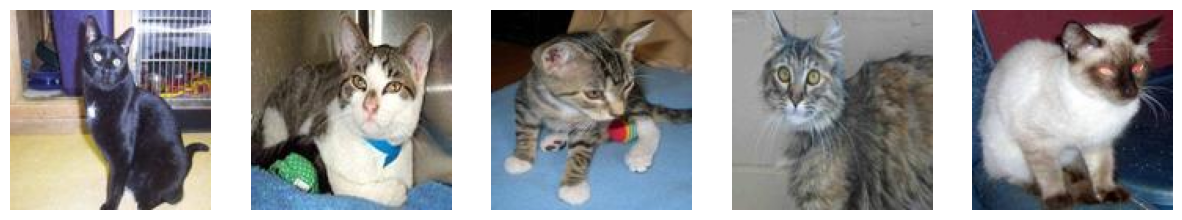

Gambar acak dari folder: dataset/train/dog


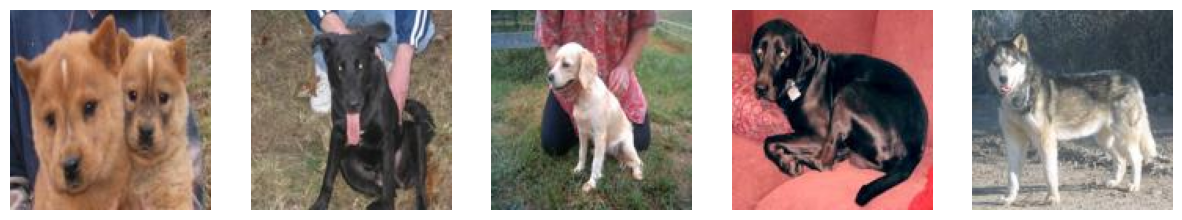

Gambar acak dari folder: dataset/validation/cat


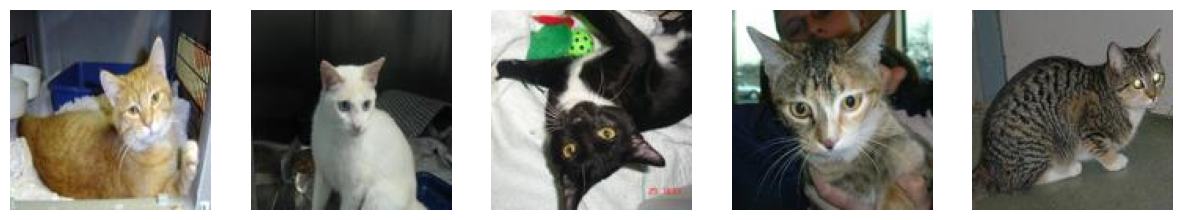

Gambar acak dari folder: dataset/validation/dog


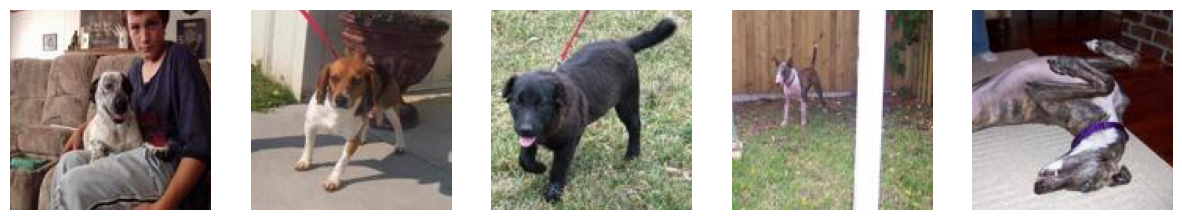

In [6]:
# prompt: show 5 image, with random image, for each folder, dataset training and valodation at every class

import matplotlib.pyplot as plt
import random
import os

def show_random_images(folder_path, num_images=5):
  """Menampilkan beberapa gambar acak dari folder tertentu."""
  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"Folder {folder_path} kosong.")
    return

  random_images = random.sample(image_files, min(num_images, len(image_files)))

  plt.figure(figsize=(15, 5))
  for i, image_file in enumerate(random_images):
      image_path = os.path.join(folder_path, image_file)
      img = plt.imread(image_path)
      plt.subplot(1, num_images, i + 1)
      plt.imshow(img)
      plt.axis('off')
  plt.show()


# Menampilkan gambar acak untuk setiap folder
folders = [
    'dataset/train/cat',
    'dataset/train/dog',
    'dataset/validation/cat',
    'dataset/validation/dog',
]

for folder in folders:
  print(f"Gambar acak dari folder: {folder}")
  show_random_images(folder)



In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan model Sequential
model = Sequential([
    # Layer Convolutional pertama dengan ukuran 32 filter dan kernel 3x3
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),  # Layer Pooling untuk mengurangi ukuran

    # Layer Convolutional kedua
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer Convolutional ketiga
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer Convolutional keempat
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Meratakan hasil konvolusi
    Flatten(),

    # Fully connected layer
    Dense(512, activation='relu'),
    Dropout(0.5),  # Regularisasi untuk mengurangi overfitting

    # Output layer dengan sigmoid untuk klasifikasi biner
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Augmentasi untuk training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generator untuk data validasi (tanpa augmentasi)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load data dari folder dataset
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Disesuaikan dengan ukuran batch dan data
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.5878 - loss: 0.6673 - val_accuracy: 0.5583 - val_loss: 0.6754
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.5864 - loss: 0.6704 - val_accuracy: 0.6183 - val_loss: 0.6501
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.6106 - loss: 0.6588 - val_accuracy: 0.6683 - val_loss: 0.6192
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.6377 - loss: 0.6387 - val_accuracy: 0.6500 - val_loss: 0.6246
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.6459 - loss: 0.6433 - val_accuracy: 0.6867 - val_loss: 0.6088
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.6119 - loss: 0.6493 - val_accuracy: 0.6900 - val_loss: 0.6067
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - accuracy: 0.6510 - loss: 0.6241 - val_accuracy: 0.7233 - val_loss: 0.5631
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - accuracy: 0.6833 - loss: 0

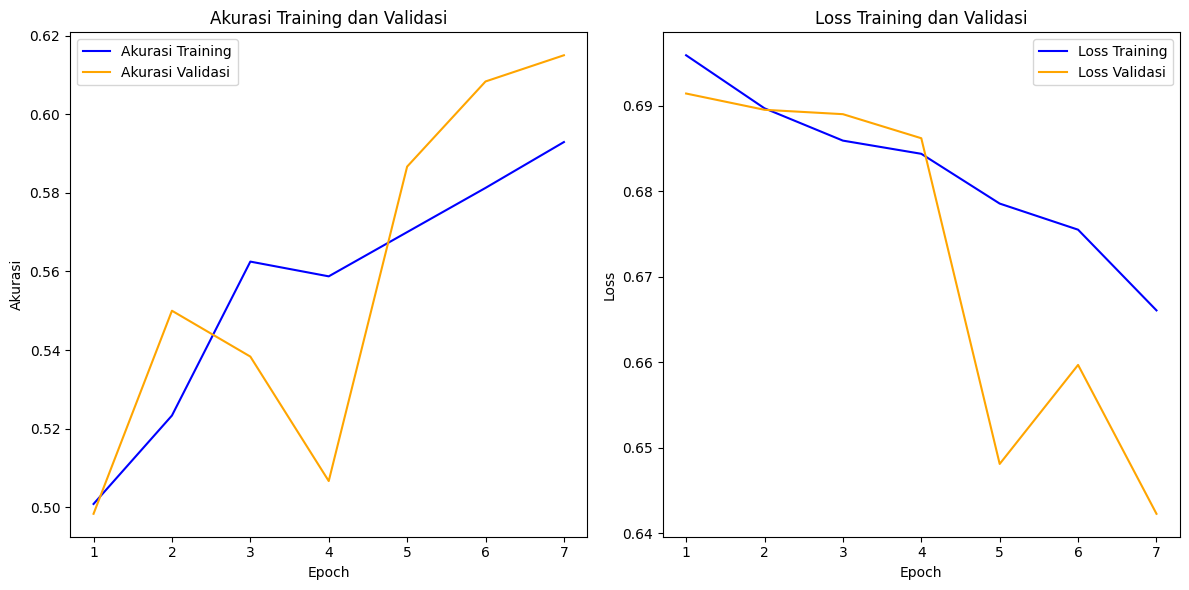

In [11]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss dari history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot pertama
plt.plot(epochs, train_acc, label='Akurasi Training', color='blue')
plt.plot(epochs, val_acc, label='Akurasi Validasi', color='orange')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # subplot kedua
plt.plot(epochs, train_loss, label='Loss Training', color='blue')
plt.plot(epochs, val_loss, label='Loss Validasi', color='orange')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [12]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5972 - loss: 0.6625
Loss: 0.6596975326538086
Accuracy: 0.6083333492279053


In [14]:
# optimasi model
# Langkah 1: Menerapkan Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# Memuat model VGG16 yang sudah dilatih sebelumnya
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Menambahkan lapisan kustom
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularisasi untuk mengurangi overfitting
predictions = Dense(1, activation='sigmoid')(x)

# Membangun model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer VGG16 untuk pelatihan awal
for layer in base_model.layers:
    layer.trainable = False

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Langkah 2: Menggunakan Augmentasi Data yang Lebih Agresif
# Augmentasi untuk training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generator untuk data validasi (tanpa augmentasi)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [19]:
# Langkah 3: Fit Model
# Latih model dengan pengaturan yang baru.

# # Mengatur EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=5,
    verbose=1,
    mode='max',
    baseline=0.85,
    restore_best_weights=True
)

# Load data dari folder dataset
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.6491 - loss: 0.9567 - val_accuracy: 0.8438 - val_loss: 0.3566
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3221
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.7703 - loss: 0.4800 - val_accuracy: 0.8038 - val_loss: 0.3873
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 0.3769
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.7891 - loss: 0.4439 - val_accuracy: 0.8628 - val_loss: 0.3000
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 0.2633
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - accuracy: 0.8020 - loss: 0.4192 - val_accuracy: 0.8663 - val_loss: 0.286

In [21]:
# Langkah 4: Fine-tuning
# Setelah pelatihan awal, kita dapat melakukan fine-tuning pada beberapa layer terakhir dari model VGG16.
# Membebaskan beberapa layer terakhir
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Kompilasi ulang model dengan learning rate yang lebih kecil
from tensorflow.keras.optimizers import Adam

# Use learning_rate instead of lr
model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model lagi
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Anda bisa menambah jumlah epoch jika perlu
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.8296 - loss: 0.3847 - val_accuracy: 0.8889 - val_loss: 0.2469
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 0.3083
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.8553 - loss: 0.3053 - val_accuracy: 0.8976 - val_loss: 0.2208
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8333 - val_loss: 0.3241
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8724 - loss: 0.3165 - val_accuracy: 0.8976 - val_loss: 0.2309
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7917 - val_loss: 0.3765
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.8670 - loss: 0.2996 - val_accuracy: 0.9149 - val_loss: 0.2038
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9167 - val_loss: 0.2621
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.8883 - loss: 0.2694

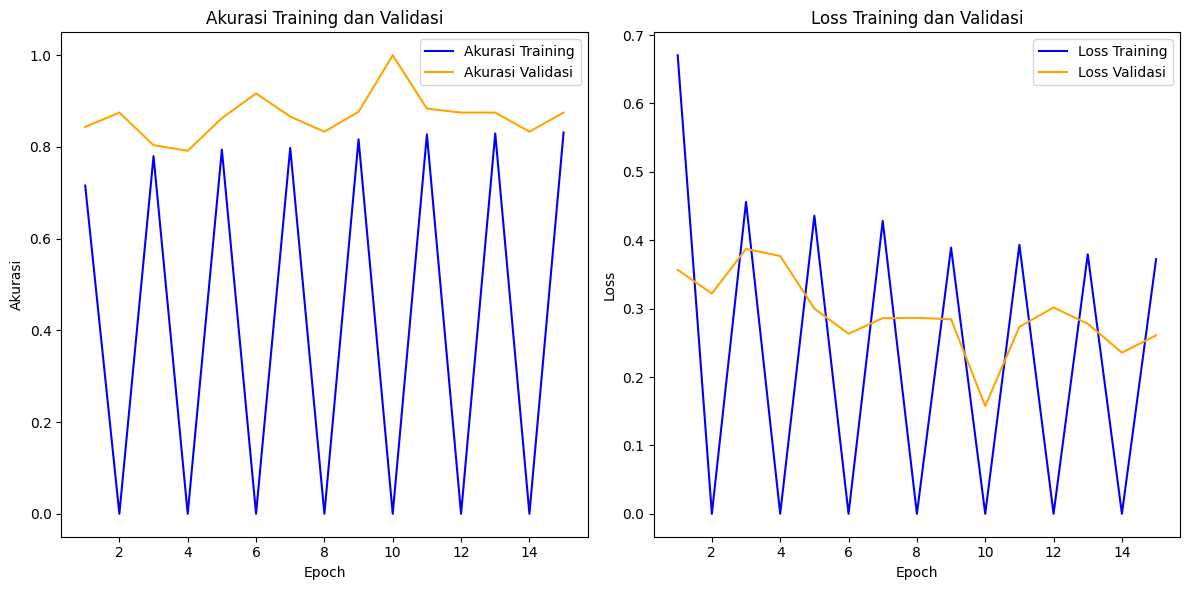

In [22]:
# Langkah 5: Visualisasi Hasil Pelatihan
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss dari history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot pertama
plt.plot(epochs, train_acc, label='Akurasi Training', color='blue')
plt.plot(epochs, val_acc, label='Akurasi Validasi', color='orange')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # subplot kedua
plt.plot(epochs, train_loss, label='Loss Training', color='blue')
plt.plot(epochs, val_loss, label='Loss Validasi', color='orange')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [23]:
# Langkah 6: Evaluasi Model
# Setelah fine-tuning, evaluasi kembali model pada data validasi untuk melihat peningkatan akurasi:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9306 - loss: 0.1772
Loss: 0.19234895706176758
Accuracy: 0.9166666865348816


In [26]:
# prompt: save the model

model.save('cat_dog_model.h5')
